In [ ]:
!pip install python-terrier
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_colbert.git
!rm -rf /content/colbertindex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 29.7 MB/s 
     |████████████████████████████████| 69 kB 6.8 MB/s 
     |████████████████████████████████| 303 kB 53.4 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 1.2 MB 53.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 294 kB 72.1 MB/s 
     |████████████████████████████████| 72 kB 1.6 MB/s 
     |████████████████████████████████| 126 kB 60.2 MB/s 
     |████████████████████████████████| 285 kB 68.7 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.1-py3-none-any.whl size=104091 sha256=a1fee9bb7a57e147bcce1a22a1adf29dccff27bf0d7d2

In [ ]:
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_t5.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/terrierteam/pyterrier_t5.git to /tmp/pip-req-build-yfksk6dt
  Running command git clone -q https://github.com/terrierteam/pyterrier_t5.git /tmp/pip-req-build-yfksk6dt
     |████████████████████████████████| 4.7 MB 4.8 MB/s 
     |████████████████████████████████| 120 kB 72.6 MB/s 
     |████████████████████████████████| 6.6 MB 49.5 MB/s 
  Created wheel for pyterrier-t5: filename=pyterrier_t5-0.0.1-py3-none-any.whl size=4880 sha256=f6d4564832676285e8628ec22e1bea5525d2b12bb75ace2b4b37b25abcae2568
  Stored in directory: /tmp/pip-ephem-wheel-cache-5mn_9nft/wheels/f7/03/ca/cf7d91992877b77796d943cfe581f27398f9fa6be41236f7f6
Successfully built pyterrier-t5
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.8.1rc1
    Uninstalling tokenizers-0.8.1rc1:
      Successfully uninstalled tokenizers-0.8.1rc1
  Attempting uninstall: transformers

In [ ]:
from pyterrier_t5 import MonoT5ReRanker, DuoT5ReRanker
monoT5 = MonoT5ReRanker()
duoT5 = DuoT5ReRanker()

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5.py:174: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [ ]:
import sys

COLAB='google.colab' in sys.modules

try:
  import faiss
  faiss.get_num_gpus()
except:
  if COLAB:
    print('Installing faiss-gpu from pip ')
    !pip install faiss-gpu==1.6.3
  else:
    print('Installing faiss-gpu via Conda')
    !conda install -c pytorch faiss-gpu

import faiss


Installing faiss-gpu from pip 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 35.5 MB 371 kB/s 


In [ ]:
assert faiss.get_num_gpus() > 0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ir_datasets
import pyterrier as pt
if not pt.started():
  pt.init()
import pyterrier_colbert.indexing
import re

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [ ]:
dataset = pt.get_dataset("irds:beir/cqadupstack/webmasters")
index_loc = "./index_path"
indexer = pt.IterDictIndexer(index_loc)
indexref = indexer.index(dataset.get_corpus_iter())
index = pt.IndexFactory.of(indexref)

[INFO] [starting] building docstore
[INFO] [starting] opening zip file
[INFO] If you have a local copy of https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/cqadupstack.zip, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/4e41456d7df8ee7760a7f866133bda78
[INFO] [starting] https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/cqadupstack.zip
docs_iter:   0%|                                     | 0/17405 [00:01<?, ?doc/s]
https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/cqadupstack.zip: 0.0%| 0.00/5.34G [00:00<?, ?B/s]
https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/cqadupstack.zip: 0.0%| 49.2k/5.34G [00:00<5:40:28, 262kB/s]
https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/cqadupstack.zip: 0.0%| 98.3k/5.34G [00:00<6:11:09, 240kB/s]
https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/cqadupstack.zip: 0.0%| 147k/5.34G [00:00<5:14:37, 283kB/s] 
https://publi

beir/cqadupstack/webmasters documents:   0%|          | 0/17405 [00:00<?, ?it/s]

In [ ]:
print(index.getCollectionStatistics().toString())

Number of documents: 17405
Number of terms: 26667
Number of postings: 669286
Number of fields: 1
Number of tokens: 1027770
Field names: [text]
Positions:   false



In [ ]:
#for retrieval and top 10 ranking
retriever_BM25 = pt.BatchRetrieve(index, controls = {"wmodel": "BM25"})
res_df = (retriever_BM25%10).search("Science")
res_df.head()

,qid,docid,docno,rank,score,query
0,1,9338,17033,0,15.674158,Science
1,1,2843,23825,1,14.598737,Science
2,1,10776,9953,2,13.629870,Science
3,1,6637,17571,3,12.093043,Science
4,1,12544,5796,4,11.886844,Science


In [ ]:
topics= dataset.get_topics()
qrels= dataset.get_qrels()

[INFO] [starting] opening zip file
[INFO] [finished] opening zip file s]


There are multiple query fields available: ('text', 'tags'). To use with pyterrier, provide variant or modify dataframe to add query column.


[INFO] [starting] opening zip file
[INFO] [finished] opening zip file s]


In [ ]:
qrels_arr =dataset.get_qrels().label
length = len(dataset.get_qrels().label)
def categorise(d):
  for i in range(length):
    if qrels.iloc[i]['docno']== d:
      if qrels_arr[i] == 1:
        return 'Relevant'
      else:
        return 'Irrelevant'
    else:
      return 'Relevant'
      
res_df['relevance'] = res_df.apply(lambda row: categorise(row['docno']), axis=1)

In [ ]:
res_df

,qid,docid,docno,rank,score,query,relevance
0,1,9338,17033,0,15.674158,Science,Relevant
1,1,2843,23825,1,14.598737,Science,Relevant
2,1,10776,9953,2,13.629870,Science,Relevant
3,1,6637,17571,3,12.093043,Science,Relevant
4,1,12544,5796,4,11.886844,Science,Relevant
5,1,5618,15905,5,10.867666,Science,Relevant
6,1,16576,12195,6,10.255486,Science,Relevant
7,1,8319,649,7,10.081833,Science,Relevant
8,1,11304,57389,8,9.662615,Science,Relevant
9,1,15371,60980,9,9.465813,Science,Relevant


In [ ]:
def preprocess(doc):
    doc = re.sub('[\t\n]', ' ', doc) # remove newlines and tabs
    doc = re.sub('[^A-Za-z0-9]+', ' ', doc)
    doc = re.sub(r'@[A-Za-z0-9_]+', ' ', doc) 
    doc = re.sub(r'#[A-Za-z0-9_]+', ' ', doc) 
    doc = re.sub(r'https?://[^ ]+', ' ', doc)
    doc = re.sub(r'www.[^ ]+', ' ', doc)
    doc = re.sub(' +', ' ', doc) # substitute any number of space with one space only
    doc = re.sub("\d+", " ", doc)
    doc = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)',' ', doc)
    doc = doc.strip() # remove spaces from begining and end and lower the text
    return doc


topics.rename(columns={"text": "query"}, inplace= True)
topics['query']= topics['query'].apply(lambda x: preprocess(x))
topics= topics.iloc[:100,:]
topics.head()

,qid,query,tags
0,28994,Someone else is using our Google Analytics Tra...,"[seo, keywords, tools, ranking, google-ranking]"
1,11544,How can help Google build SiteLinks,"[seo, keywords, tools, ranking, google-ranking]"
2,25062,Any other web Analytics tool other than Google...,"[seo, keywords, tools, ranking, google-ranking]"
3,19714,Shared Web Hosting provider for video or socia...,"[seo, keywords, tools, ranking, google-ranking]"
4,6796,Make the content area div come next the menu bar,"[seo, keywords, tools, ranking, google-ranking]"


In [ ]:
res_BM25=retriever_BM25.transform(topics) 
eval = pt.Utils.evaluate(res_BM25,qrels,metrics=["map"], perquery=True)
checkpoint="http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip"

indexer_colbert = pyterrier_colbert.indexing.ColBERTIndexer(checkpoint, "/content", "colbertindex", chunksize=3)
indexer_colbert.index(dataset.get_corpus_iter())

colbert_ranking = indexer_colbert.ranking_factory()
colbert_e2e = colbert_ranking.end_to_end()

beir/cqadupstack/webmasters documents:   0%|          | 0/17405 [00:00<?, ?it/s]

[Aug 23, 20:25:48] [0] 		 #> Local args.bsize = 128
[Aug 23, 20:25:48] [0] 		 #> args.index_root = /content
[Aug 23, 20:25:48] [0] 		 #> self.possible_subset_sizes = [69905]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ColBERT from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ColBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['linear.weight']
You should probably TRAI

[Aug 23, 20:25:58] #> Loading model checkpoint.
[Aug 23, 20:25:58] #> Loading checkpoint http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip


Downloading: "http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip" to /root/.cache/torch/hub/checkpoints/colbert.dnn.zip


  0%|          | 0.00/1.11G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/hub.py:647: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


[Aug 23, 20:26:56] #> checkpoint['epoch'] = 0
[Aug 23, 20:26:56] #> checkpoint['batch'] = 44500






[Aug 23, 20:26:58] #> Note: Output directory /content already exists




[Aug 23, 20:26:58] #> Creating directory /content/colbertindex 


[Aug 23, 20:29:59] [0] 		 #> Completed batch #0 (starting at passage #0) 		Passages/min: 5.8k (overall),  5.8k (this encoding),  19211.0M (this saving)
[Aug 23, 20:30:00] [0] 		 [NOTE] Done with local share.
[Aug 23, 20:30:00] [0] 		 #> Joining saver thread.
[Aug 23, 20:30:01] [0] 		 #> Saved batch #0 to /content/colbertindex/0.pt 		 Saving Throughput = 443.9k passages per minute.

#> num_embeddings = 2145737
[Aug 23, 20:30:02] #> Starting..
[Aug 23, 20:30:02] #> Processing slice #1 of 1 (range 0..1).
[Aug 23, 20:30:02] #> Will write to /content/colbertindex/ivfpq.100.faiss.
[Aug 23, 20:30:02] #> Loading /content/colbertindex/0.sample ...
#> Sample has shape (107286, 128)
[Aug 23, 20:30:02] Preparing resources for 1 GPUs.
[Aug 23, 20:30:02] #> Training with the vectors...
[Aug 23, 20:30:02] #> Training now (using 1 GPUs)...
111.65412473678589
101.

Loading index shards to memory:   0%|          | 0/1 [00:00<?, ?shard/s]

In [ ]:
!pip install  --upgrade git+https://github.com/cmacdonald/pyterrier_bert.git
from pyterrier_bert.bert4ir import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cmacdonald/pyterrier_bert.git to /tmp/pip-req-build-q1x4sncf
  Running command git clone -q https://github.com/cmacdonald/pyterrier_bert.git /tmp/pip-req-build-q1x4sncf
  Cloning https://github.com/Georgetown-IR-Lab/cedr.git to /tmp/pip-install-ed8iob4e/cedr_d7e0b93aae7440e5b907c0266e4cbb30
  Running command git clone -q https://github.com/Georgetown-IR-Lab/cedr.git /tmp/pip-install-ed8iob4e/cedr_d7e0b93aae7440e5b907c0266e4cbb30
  Cloning https://github.com/terrier-org/pyterrier.git to /tmp/pip-install-ed8iob4e/python-terrier_858a07421e4f4197b37039087d71f5fe
  Running command git clone -q https://github.com/terrier-org/pyterrier.git /tmp/pip-install-ed8iob4e/python-terrier_858a07421e4f4197b37039087d71f5fe
     |████████████████████████████████| 753.4 MB 6.7 kB/s 
  Cloning https://github.com/cvangysel/pytrec_eval.git to /tmp/pip-install-ed8iob4e/pytrec-eval_0d

In [ ]:
BM25 = pt.BatchRetrieve(indexref, controls = {"wmodel": "BM25"})
TF_IDF =  pt.BatchRetrieve(indexref, controls = {"wmodel": "TF_IDF"})
PL2 =  pt.BatchRetrieve(indexref, controls = {"wmodel": "PL2"})
DirichletLM = pt.BatchRetrieve(indexref, wmodel="DirichletLM")

In [ ]:
def experiment(transformers, names_):
  return pt.Experiment(transformers, topics, qrels, ['map','ndcg'], names = names_, baseline=0)

In [ ]:
BM25 = pt.BatchRetrieve(indexref, controls = {"wmodel": "BM25"})
TF_IDF =  pt.BatchRetrieve(indexref, controls = {"wmodel": "TF_IDF"})
PL2 =  pt.BatchRetrieve(indexref, controls = {"wmodel": "PL2"})
DirichletLM = pt.BatchRetrieve(indexref, wmodel="DirichletLM")
pipe_BM25 = BM25 >> (TF_IDF ** PL2) #union of TD_IDF and PL2 , re-rank with BM25
pipe_colbert_bm25 = BM25%10 >> colbert_e2e
colbert_prf_rank = colbert_ranking.prf(rerank=False)  #colbert and colbert=prf rank
colbert_prf_rerank = colbert_ranking.prf(rerank=True)
pipe_bm25_col = colbert_e2e >> BM25
bo1 = pt.rewrite.Bo1QueryExpansion(index)
bo1_prf= BM25%10 >> bo1
pipe_bm25_bo1prf = (bo1_prf) >> colbert_e2e
DPH_br = pt.BatchRetrieve(indexref, controls = {"wmodel": "DPH"}) 
bertpipe = DPH_br >> BERTPipeline(max_valid_rank=10)
bm25_colbert_prf = BM25 >> colbert_prf_rank
pipe_bm25_bert = bertpipe >> BM25
pipe_bm25_prf_colbert = colbert_e2e%10 >> (BM25 >> colbert_prf_rank)
bm25 = pt.BatchRetrieve(indexref, wmodel="BM25") % 10
mono_pipeline = bm25 >> pt.text.get_text(dataset, "text") >> monoT5
duo_pipeline = mono_pipeline % 10 >> duoT5


loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a

[Aug 23, 20:36:36] #> Building the emb2tid mapping..
2145737
Computing collection frequencies
Done
Loading doclens


Computing document frequencies: 100%|██████████| 17405/17405 [00:00<00:00, 32613.43d/s]


  0%|          | 0/30522 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1037: UserWarning: You have sklearn version 1.0.2 - sklearn KMeans clustering changed in 0.24, so performance may differ from those reported in the ICTIR 2021 paper, which used 0.23.2. See also https://github.com/scikit-learn/scikit-learn/issues/19990
  "See also https://github.com/scikit-learn/scikit-learn/issues/19990" % str(sklearn.__version__))


  0%|          | 0/30522 [00:00<?, ?it/s]

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/resolve/ma

storing https://huggingface.co/distilbert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
creating metadata file for /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_

storing https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
creating metadata file for /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weigh

In [ ]:
e1_trans= [BM25,TF_IDF,PL2,DirichletLM, colbert_e2e, pipe_BM25, pipe_colbert_bm25, colbert_prf_rerank, pipe_bm25_col, pipe_bm25_bo1prf, pipe_bm25_prf_colbert, bm25, mono_pipeline, duo_pipeline]
e1_names= ['BM25','TF_IDF', 'PL2', 'DirichletLM', 'ColBERT','bm25_tdidfpl2', 'COL_BM25', 'Colbert_prf_rank', 'BM25_Col', 'bo1_col', 'BM25_PRF_COLBERT',"BM25", "BM25 >> monoT5", "BM25 >> monoT5 >> duoT5"]
finalOut = experiment(e1_trans, e1_names)

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1084: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  torch.Tensor(exp_embds)])
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  kmn.fit(prf_embs)


monoT5:   0%|          | 0/250 [00:00<?, ?batches/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (659 > 512). Running this sequence through the model will result in indexing errors


monoT5:   0%|          | 0/250 [00:00<?, ?batches/s]

duoT5:   0%|          | 0/100 [00:00<?, ?queries/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (562 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# setting baseline as BM25
finalOut['idx']=finalOut.index
finalOut

,name,map,ndcg,map +,map -,map p-value,ndcg +,ndcg -,ndcg p-value,idx
0,BM25,0.136459,0.266252,NaN,NaN,NaN,NaN,NaN,NaN,0
1,TF_IDF,0.137358,0.267791,45.0,26.0,0.484342,46.0,25.0,3.997633e-01,1
2,PL2,0.140201,0.271569,37.0,38.0,0.472808,39.0,36.0,3.284459e-01,2
3,DirichletLM,0.073829,0.193317,13.0,70.0,0.001430,14.0,69.0,1.086071e-05,3
4,ColBERT,0.189363,0.339764,63.0,27.0,0.010489,66.0,24.0,5.152313e-05,4
5,bm25_tdidfpl2,0.136459,0.266252,0.0,0.0,NaN,0.0,0.0,NaN,5
6,COL_BM25,0.189363,0.339764,63.0,27.0,0.010489,66.0,24.0,5.152313e-05,6
7,Colbert_prf_rank,0.159393,0.287172,46.0,37.0,0.288255,47.0,36.0,2.612318e-01,7
8,BM25_Col,0.137955,0.293203,68.0,3.0,0.033496,69.0,2.0,9.976970e-08,8
9,bo1_col,0.001210,0.072316,6.0,82.0,0.000003,7.0,81.0,3.222883e-11,9


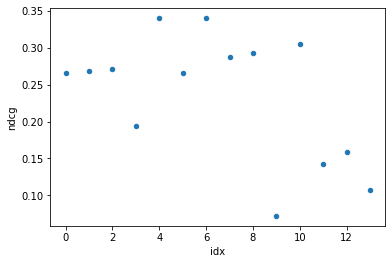

In [ ]:
ax1 = finalOut.plot.scatter(x='idx', y='ndcg', colormap='viridis')

In [ ]:
e1_trans= [colbert_e2e, BM25,TF_IDF,PL2,DirichletLM, pipe_BM25, pipe_colbert_bm25, colbert_prf_rerank, pipe_bm25_col, pipe_bm25_bo1prf, pipe_bm25_prf_colbert, bm25, mono_pipeline, duo_pipeline]
e1_names= ['ColBERT', 'BM25','TF_IDF', 'PL2', 'DirichletLM','bm25_tdidfpl2', 'COL_BM25', 'Colbert_prf_rank', 'BM25_Col', 'bo1_col', 'BM25_PRF_COLBERT',"BM25", "BM25 >> monoT5", "BM25 >> monoT5 >> duoT5"]
finalOut = experiment(e1_trans, e1_names)

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1042: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  kmn.fit(prf_embs)


monoT5:   0%|          | 0/250 [00:00<?, ?batches/s]

monoT5:   0%|          | 0/250 [00:00<?, ?batches/s]

duoT5:   0%|          | 0/100 [00:00<?, ?queries/s]

In [ ]:
# setting baseline as ColBERT
finalOut['idx']=finalOut.index
finalOut

,name,map,ndcg,map +,map -,map p-value,ndcg +,ndcg -,ndcg p-value,idx
0,ColBERT,0.189363,0.339764,NaN,NaN,NaN,NaN,NaN,NaN,0
1,BM25,0.136459,0.266252,27.0,63.0,1.048940e-02,24.0,66.0,5.152313e-05,1
2,TF_IDF,0.137358,0.267791,29.0,61.0,1.222240e-02,25.0,65.0,6.625951e-05,2
3,PL2,0.140201,0.271569,32.0,58.0,2.154500e-02,27.0,63.0,2.249500e-04,3
4,DirichletLM,0.073829,0.193317,14.0,80.0,3.467590e-06,10.0,84.0,3.780423e-11,4
5,bm25_tdidfpl2,0.136459,0.266252,27.0,63.0,1.048940e-02,24.0,66.0,5.152313e-05,5
6,COL_BM25,0.189363,0.339764,0.0,0.0,NaN,0.0,0.0,NaN,6
7,Colbert_prf_rank,0.159393,0.287172,25.0,63.0,2.258362e-02,18.0,70.0,5.552498e-06,7
8,BM25_Col,0.137955,0.293203,32.0,57.0,1.268586e-02,33.0,56.0,7.725750e-03,8
9,bo1_col,0.001210,0.072316,2.0,94.0,6.262115e-08,2.0,94.0,9.309276e-16,9


In [ ]:
ax1 = finalOut.plot.scatter(x='idx', y='ndcg', colormap='viridis')